# Rental Price Optimization – Key Findings Analysis


In [2]:
# Cell 1: Imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure plots appear inline
%matplotlib inline


---
Load the cleaned rental data CSV.  
Replace the filename with your actual file path.


In [3]:
# Cell 2: Load data
df = pd.read_csv('san_diego_county_rentals_2025-04-25.csv')

# Quick peek
df.head()


,Property,Address,City,State,ZipCode,Phone,Unit,Beds,Baths,Beds_Baths,...,HasWasherDryer,HasAirConditioning,HasPool,HasSpa,HasGym,HasEVCharging,StorageFee,AllowsDogs,AllowsCats,ListingURL
0,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1413,1,1.0,1 Bed / 1 Bath,...,True,True,True,False,True,False,NaN,False,False,https://www.apartments.com/radian-san-diego-ca...
1,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1513,1,1.0,1 Bed / 1 Bath,...,True,True,True,False,True,False,NaN,False,False,https://www.apartments.com/radian-san-diego-ca...
2,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1613,1,1.0,1 Bed / 1 Bath,...,True,True,True,False,True,False,NaN,False,False,https://www.apartments.com/radian-san-diego-ca...
3,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1210,1,1.0,1 Bed / 1 Bath,...,True,True,True,False,True,False,NaN,False,False,https://www.apartments.com/radian-san-diego-ca...
4,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1510,1,1.0,1 Bed / 1 Bath,...,True,True,True,False,True,False,NaN,False,False,https://www.apartments.com/radian-san-diego-ca...


---
**Compute median and IQR for PricePerSqFt.**  
IQR = Q3 − Q1


In [4]:
# Cell 3: Median & IQR
ppsqft = df['PricePerSqFt'].dropna()
median_pp = ppsqft.median()
q1, q3 = ppsqft.quantile([0.25, 0.75])
iqr = q3 - q1

print(f"Median PricePerSqFt: ${median_pp:.2f}")
print(f"IQR: ${q1:.2f} – ${q3:.2f} (IQR = ${iqr:.2f})")


Median PricePerSqFt: $3.49
IQR: $3.04 – $4.06 (IQR = $1.02)


---
**Top 3 cities by average PricePerSqFt.**


In [5]:
# Cell 5: Rent by Beds
beds_price = df.groupby('Beds')['Price'].mean().round().astype(int)
print("Average Rent by # Beds:")
print(beds_price.to_string())


Average Rent by # Beds:
Beds
0    2348
1    2738
2    3358
3    4193
4    1478


---
**Amenity premiums:**  
For each amenity flag, compute  


In [6]:
# Cell 6: Amenity Premiums
amenities = ['HasWasherDryer','HasAirConditioning','HasPool','HasSpa','HasGym']
premiums = {}
for amen in amenities:
    with_avg  = df.loc[df[amen]==True, 'PricePerSqFt'].mean()
    without_avg = df.loc[df[amen]==False, 'PricePerSqFt'].mean()
    premiums[amen] = (with_avg - without_avg) / without_avg * 100

# Display
print("Amenity Premiums (%):")
for amen, pct in premiums.items():
    print(f"  {amen}: {pct:.1f}%")


Amenity Premiums (%):
  HasWasherDryer: 6.3%
  HasAirConditioning: 4.0%
  HasPool: -11.3%
  HasSpa: -5.3%
  HasGym: 4.3%


---
**Pet allowance percentages**  
What share of listings allow dogs/cats?


In [7]:
# Cell 7: Pet allowances
dog_pct = df['AllowsDogs'].mean() * 100
cat_pct = df['AllowsCats'].mean() * 100
print(f"Allows Dogs: {dog_pct:.0f}%")
print(f"Allows Cats: {cat_pct:.0f}%")


Allows Dogs: 0%
Allows Cats: 0%


---
**Rental-type distribution**  
What percent of listings are each type?


In [8]:
# Cell 8: Rental type distribution
rental_dist = df['RentalType'].value_counts(normalize=True) * 100
print("Rental Type Distribution (%):")
print(rental_dist.round(1).to_string())


Rental Type Distribution (%):
RentalType
Apartment    100.0


---
**Histogram of PricePerSqFt**  
Visualize the full distribution (snapshot).


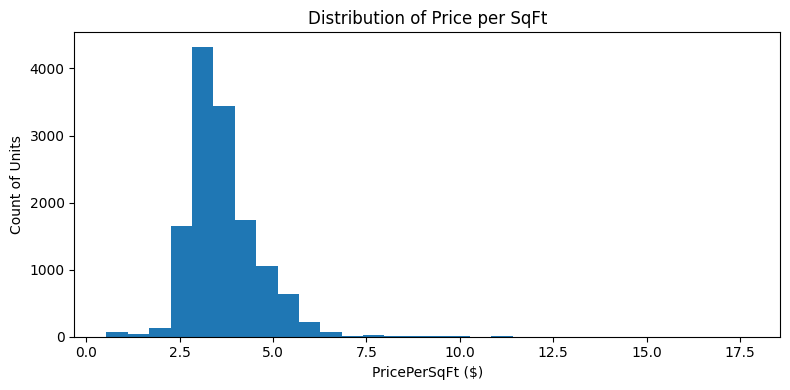

In [9]:
# Cell 9.1: Histogram
plt.figure(figsize=(8,4))
plt.hist(ppsqft, bins=30)
plt.title('Distribution of Price per SqFt')
plt.xlabel('PricePerSqFt ($)')
plt.ylabel('Count of Units')
plt.tight_layout()
plt.show()


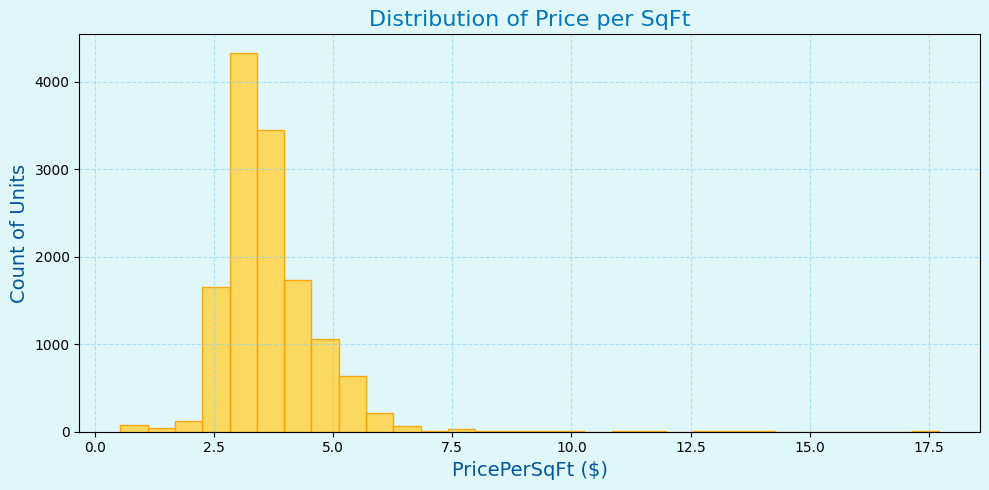

In [10]:
# Cell 9.2: Styled Beach/Sunshine Histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), facecolor='#e0f7fa')      # Light sky-blue canvas
ax = plt.gca()
ax.set_facecolor('#e0f7fa')

# Sunny yellow bars with golden edges
plt.hist(ppsqft, bins=30,
         color='#FFD54F',      # sunshine yellow
         edgecolor='#FFA000',  # deeper gold
         alpha=0.9)

plt.title('Distribution of Price per SqFt', color='#0277BD', fontsize=16)   # ocean blue title
plt.xlabel('PricePerSqFt ($)', color='#01579B', fontsize=14)
plt.ylabel('Count of Units',   color='#01579B', fontsize=14)

# Light wave-style grid
plt.grid(True, linestyle='--', color='#81D4FA', alpha=0.6)

plt.tight_layout()
plt.show()
